In [1]:
# plt.imshow(wordcloud, interpolation='bilinear') ??? meaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
from wordcloud import WordCloud
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
import warnings


warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [4]:
useducation

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


In [5]:
#Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the 
#data. You're supposed to provide your answers to the following questions after you handled the missing values.

# 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
# 2.Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. 
#   How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and 
#   information around those dates.
# 3.In your chosen state, which of the lessons are the students more successful, math or reading?
# 4.What are the distributions of the math and reading scores in the sample?
# 5.Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, 
# and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [6]:
# question 1

column_list = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE',
              'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']
states = useducation['STATE'].unique()
for state in states:
    useducation.loc[useducation['STATE']== state,column_list] = useducation.loc[useducation['STATE']==state,column_list].interpolate(method='linear',limit_direction='forward')

useducation.dropna(inplace=True)

In [7]:
useducation.isnull().sum()*100/useducation.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

In [8]:
useducation.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


In [9]:
useducation.describe(include= 'all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466,466,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
unique,465,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,NaN,NaN,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,NaN,NaN,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,NaN,NaN,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,NaN,NaN,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,NaN,NaN,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884


In [10]:
# question 2

cal_df = useducation.loc[useducation['STATE']== 'CALIFORNIA',:]
cal_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
420,2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,...,489043.0,441877.0,357789.0,3804640.0,1707952.0,5602511.0,213.565125,262.171027,205.916588,264.494066
576,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,5899326.0,227.454982,267.049501,205.632437,255.073380
680,2005_CALIFORNIA,CALIFORNIA,2005,6307022.0,62171797.0,7148863.0,34912166.0,20110768.0,66196072.0,31070450.0,...,477828.0,489560.0,423241.0,3848455.0,1953077.0,5926631.0,230.366957,268.558129,206.512026,264.184510
784,2007_CALIFORNIA,CALIFORNIA,2007,6288686.0,72516936.0,7200298.0,42333637.0,22983001.0,73225422.0,34685013.0,...,467305.0,490054.0,468281.0,3801685.0,2011865.0,5881552.0,230.034091,270.381784,208.522186,268.159428
891,2009_CALIFORNIA,CALIFORNIA,2009,6234155.0,73958896.0,9745250.0,40084244.0,24129402.0,74766086.0,35617964.0,...,465866.0,472856.0,478503.0,3717166.0,1997064.0,5786013.0,231.674927,270.448588,209.762405,254.895247
997,2011_CALIFORNIA,CALIFORNIA,2011,6202604.0,70953331.0,9990221.0,37752712.0,23210398.0,69847705.0,34225248.0,...,462082.0,467626.0,494144.0,3742708.0,1977069.0,5793407.0,234.164993,272.769803,211.358636,261.285252
1101,2013_CALIFORNIA,CALIFORNIA,2013,6208733.0,68868516.0,7836263.0,35141208.0,25891045.0,69727119.0,34194878.0,...,470515.0,472381.0,498403.0,3771067.0,1952314.0,5799332.0,233.654465,275.901351,212.545968,260.448287
1203,2015_CALIFORNIA,CALIFORNIA,2015,6226523.0,78248042.0,7556365.0,42360470.0,28331207.0,78365958.0,38951948.0,...,485885.0,465322.0,492835.0,3748465.0,1941009.0,5794141.0,231.549345,275.324573,212.677949,258.768268
1451,2017_CALIFORNIA,CALIFORNIA,2017,6217031.0,89217262.0,7709079.0,50904567.0,30603616.0,85320133.0,42587272.0,...,485885.0,465322.0,492835.0,3748465.0,1941009.0,5794141.0,232.262941,276.638200,215.421814,262.520630


In [11]:
new_df2 = pd.concat([cal_df['YEAR'],cal_df['TOTAL_REVENUE'],cal_df['TOTAL_EXPENDITURE']],axis=1)
new_df2

,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
213,1996,31282981.0,31561692.0
420,2000,46628207.0,45829753.0
576,2003,59815855.0,59749885.0
680,2005,62171797.0,66196072.0
784,2007,72516936.0,73225422.0
891,2009,73958896.0,74766086.0
997,2011,70953331.0,69847705.0
1101,2013,68868516.0,69727119.0
1203,2015,78248042.0,78365958.0
1451,2017,89217262.0,85320133.0


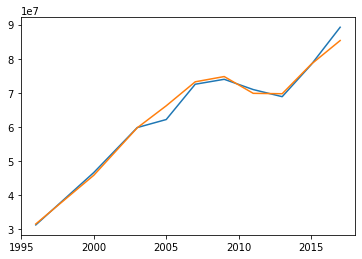

In [12]:
#sns.lineplot(x=md_df['Year'], y=md_df['TOTAL_REVENUE'],data=md_df)
plt.plot(cal_df['YEAR'], cal_df['TOTAL_REVENUE'])
plt.plot(cal_df['YEAR'], cal_df['TOTAL_EXPENDITURE'])

In [13]:
# question 3
cal_df['AVG_MATH_4_SCORE'].describe()

count     10.000000
mean     227.385691
std        8.724144
min      209.129083
25%      228.099759
50%      230.958151
75%      232.115938
max      234.164993
Name: AVG_MATH_4_SCORE, dtype: float64

In [14]:
cal_df['AVG_MATH_8_SCORE'].describe()

count     10.000000
mean     270.201543
std        5.155037
min      262.171027
25%      267.426658
50%      270.415186
75%      274.685881
max      276.638200
Name: AVG_MATH_8_SCORE, dtype: float64

In [15]:

cal_df['AVG_READING_4_SCORE'].describe()

count     10.000000
mean     209.026260
std        4.095743
min      201.912591
25%      206.065447
50%      209.142296
75%      212.249135
max      215.421814
Name: AVG_READING_4_SCORE, dtype: float64

In [16]:
cal_df['AVG_READING_8_SCORE'].describe()

count     10.000000
mean     261.902652
std        4.861743
min      254.895247
25%      259.188273
50%      261.902941
75%      264.416677
max      269.197451
Name: AVG_READING_8_SCORE, dtype: float64

213      7.216492
420      7.648537
576     21.822545
680     23.854931
784     21.511905
891     21.912522
997     22.806357
1101    21.108497
1203    18.871396
1451    16.841127
dtype: float64


213     -6.424972
420     -2.323040
576     11.976121
680      4.373619
784      2.222356
891     15.553342
997     11.484551
1101    15.453063
1203    16.556305
1451    14.117570
dtype: float64


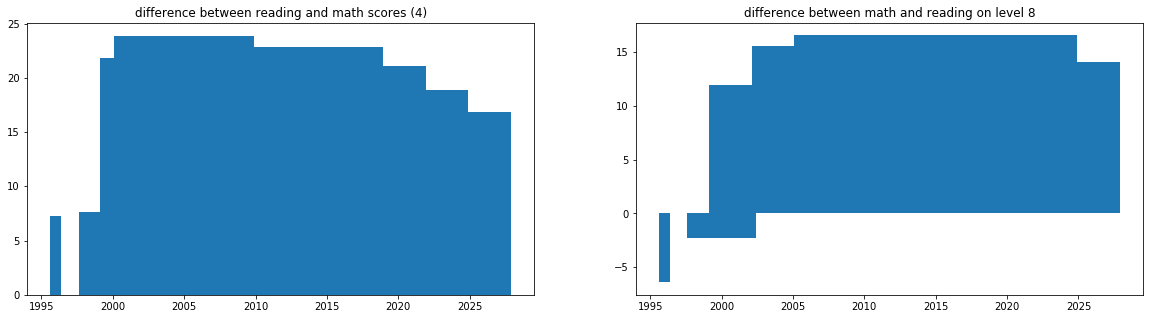

In [17]:
# check the difference between reading and math using histogram
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(useducation.loc[useducation['STATE'] == 'CALIFORNIA','YEAR'], useducation.loc[useducation['STATE']=='CALIFORNIA','AVG_MATH_4_SCORE']- useducation.loc[useducation['STATE']=='CALIFORNIA','AVG_READING_4_SCORE'])
plt.title("difference between math and reading on level 4")



plt.title("difference between reading and math scores (4)")
        
plt.subplot(1,2,2)
plt.bar(useducation.loc[useducation['STATE'] == 'CALIFORNIA','YEAR'], useducation.loc[useducation['STATE']=='CALIFORNIA','AVG_MATH_8_SCORE']- useducation.loc[useducation['STATE']=='CALIFORNIA','AVG_READING_8_SCORE'])
plt.title("difference between math and reading on level 8")

# print out the actual differences
print(useducation.loc[useducation['STATE']=='CALIFORNIA','AVG_MATH_4_SCORE']- useducation.loc[useducation['STATE']=='CALIFORNIA','AVG_READING_4_SCORE'])
print('\n')
print(useducation.loc[useducation['STATE']=='CALIFORNIA','AVG_MATH_8_SCORE']- useducation.loc[useducation['STATE']=='CALIFORNIA','AVG_READING_8_SCORE'])

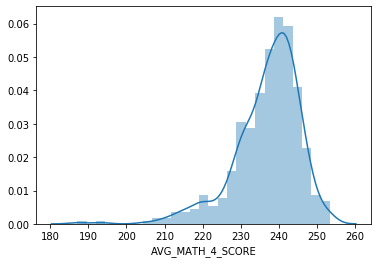

In [18]:
sns.distplot(useducation['AVG_MATH_4_SCORE'])

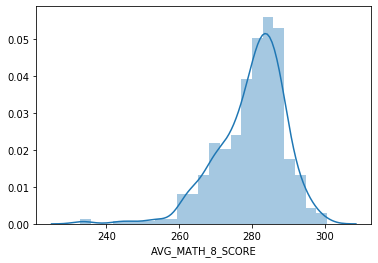

In [19]:
sns.distplot(useducation['AVG_MATH_8_SCORE'])

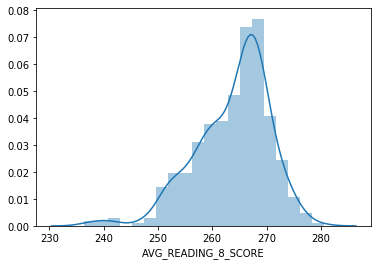

In [20]:
sns.distplot(useducation['AVG_READING_8_SCORE'])

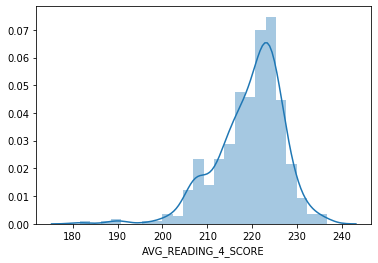

In [21]:
sns.distplot(useducation['AVG_READING_4_SCORE'])

In [22]:
# question 5

In [28]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df_q5 = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

(array([   3.,    0.,    3.,   15.,   35.,   48.,   94., 1100.,  163.,
          31.]), array([187.13466996, 193.76329908, 200.39192819, 207.02055731,
        213.64918643, 220.27781555, 226.90644466, 233.53507378,
        240.1637029 , 246.79233202, 253.42096113]), <a list of 10 Patch objects>)

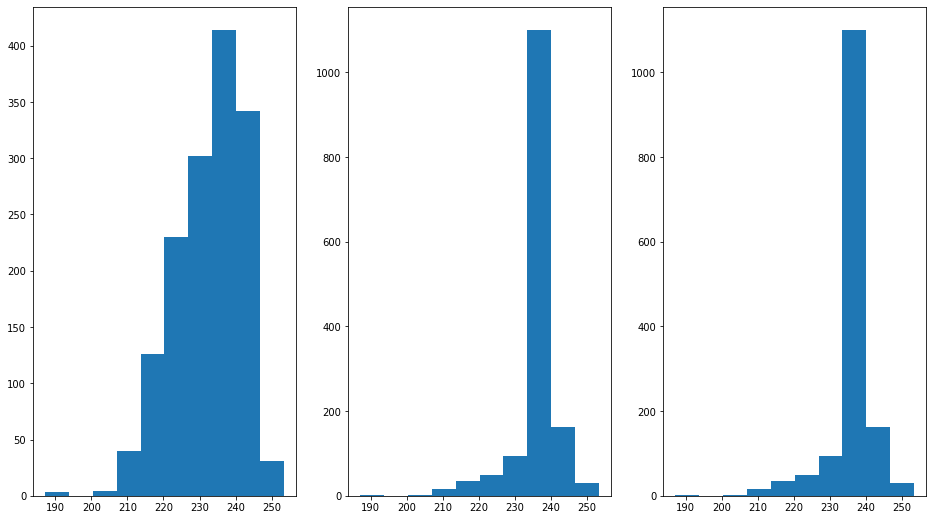

In [29]:
plt.figure(figsize=(16,9))
plt.subplot(1,3,1)
plt.hist((df_q5['AVG_MATH_4_SCORE']).interpolate())
plt.subplot(1,3,2)
plt.hist((df_q5['AVG_MATH_4_SCORE']).fillna(df_q5['AVG_MATH_4_SCORE'].mean()))
plt.subplot(1,3,3)
plt.hist((df_q5['AVG_MATH_4_SCORE']).fillna(df_q5['AVG_MATH_4_SCORE'].median()))

